In [1]:
import json5
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import socket 
from socket import *

In [2]:
attr =  pd.read_csv('crop_attr.csv',index_col ="Attr")

soil_enrich = pd.read_csv('Cover-crops-for-all-seasons-converted.csv' , index_col ="Crop Species")

grains = pd.read_csv('GrainsCompared.csv',index_col ="name")

sp_veg = pd.read_csv('spice_and_vegCompared.csv',index_col ="name")

f = open('comb.json')
comb = json5.load(f)


{'id0': 0, 'id1': 2, 'id2': 1}
['id0', 'id1', 'id2']
1
probable (1, 25.4)
probable_class 1
no_of_subclass 2
------Combination of classes for nutient:  Iron 
  {1: 25.4, 2: 6.74} details 
 {1: [{'sesame': 14.6}, {'moth bean': 10.8}], 2: [{'mungbean': 6.74}]}


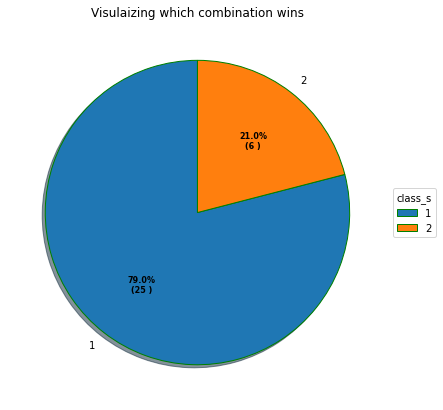

{'Pearl millet': 1.4, 'sesame': 0.34488188976377954, 'moth bean': 0.2551181102362205}


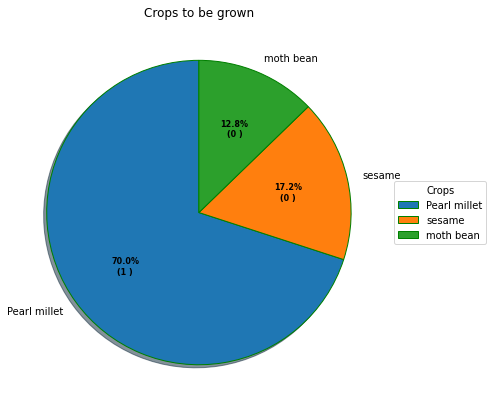

------Cover plants present in the crop combinations suggested : [] 


Few other cover crops which are suitable 

------How benificial it is given in Main tons and biomass index produced per 100g 

                 Seeding                                     When to plant2  \
Crop Species                                                                  
Lana vetch         20-60                         early spring   late summer   
Field peas        70-120                                       early spring   
Lupine            70-120                         early spring   late summer   
Purple vetch       30-80                          early spring  late summer   
Bell / fava bean  80-150                                       early spring   
Ryegrass, ann.     15-30     early spring             \nlate summer           
Spring Barley     50-125  early spring              late summer         ...   
Spring oats       80-140    early spring         \nlate summer                
Black oats   

In [24]:

def nutrient_amount_key(clas,catog,dummy,crop_ratio_key,k):
    
    if (dummy !="all"):
        ratio = clas[k][dummy]
        crop_ratio_key.append({k:ratio})

    else:
        
        ratio = clas[k].sum() 
        crop_ratio_key.append({k:ratio})
        
       
    return(crop_ratio_key)

def nutrient_amount(j,clas,catog,dummy,crop_ratio,s,crop_b):
    for k in j[catog]:
        
        if (dummy !="all"):
            ratio = clas[k][dummy]
            crop_ratio.append({k:ratio})
            #print("crop ratio:",crop_ratio)
            s=s+ratio
            
            cr = soil_enr_crop(k,crop_b)
            
        else:
            ratio = clas[k].sum() 
            crop_ratio.append({k:ratio})
            #print("crop ratio:",crop_ratio)
            s=s+ratio
            
            cr = soil_enr_crop(k,crop_b)
    return(s,crop_ratio,cr)


def soil_enr_crop(crop,crop_b):
    
    
    l=(soil_enrich.index).tolist()
    low = [i.lower() for i in l]
    if crop.lower() in low:
        
        crop_b.append(crop)
    
    return(crop_b)

def soil_enr_season(season,soil_crop):  
    
    seas = soil_enrich["When to plant2"]
    for key,value in seas.iteritems():
        #print(value)
        match = re.search(season,value)
        if (match):
            soil_crop.append(key)
            
    #print(soil_crop)
    return(soil_crop)


def plotting(diction,titl_e,P_content):
    
    names = list(diction.keys())
    values = list(diction.values())

    #plt.bar(range(len(data)), values, tick_label=names)
    #plt.show()

    #fig = plt.figure(figsize =(10, 7))
    #plt.pie(values, labels = names)


    # Wedge properties
    wp = { 'linewidth' : 1, 'edgecolor' : "green" }

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d} )".format(pct, absolute)

    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(values, 
                                      autopct = lambda pct: func(pct, values),
                                      labels = names,
                                      shadow = True,
                                      startangle = 90,
                                      wedgeprops = wp,
                                      textprops = dict(color ="black"))

    # Adding legend
    ax.legend(wedges, names,
              title =titl_e,
              loc ="center left",
              bbox_to_anchor =(1, 0, 0.5, 1))

    plt.setp(autotexts, size = 8, weight ="bold")
    ax.set_title(P_content)

    # show plot

    # show plot
    plt.show()



def category1(inp):
    category=1
    i_d =inp[1]
    crop=inp[2]
    dummy = inp[4]
    acer_count = inp[3]
    
    ## initializations

    crop_ratio={}
    crop_ratio_key=[]

    l=(soil_enrich.index).tolist()
    #low = [i.lower() for i in l]
    if crop in l:
        season = attr[crop]["season"]

    ## soil enrich sec

    crop_b =[]
    soil_crop=[]
    crop_b = soil_enr_crop(crop,crop_b)
    

    soil_crop = soil_enr_season(season,soil_crop)
    



    crop_ratio_key = nutrient_amount_key(grains,"2",dummy,crop_ratio_key,crop)

    l=len(comb[crop])  
    content ={}
    for i in range(1,l+1):

        a=comb[crop][i-1]
       

        for j in a:
            
            s=0
            crop_ratio_ini=[]

            if "1" in j:
                s,crop_ratio_ini,crop_b=nutrient_amount(j,sp_veg,"1",dummy,crop_ratio_ini,s,crop_b)
                


            else:
                s,crop_ratio_ini,crop_b=nutrient_amount(j,grains,"2",dummy,crop_ratio_ini,s,crop_b)
                



            content[i]=s
            crop_ratio[i]=crop_ratio_ini
    '''
    print("content",content)        
    print("crop_ratio",crop_ratio)
    print("crop_ratio_key",crop_ratio_key)
    print("soil crop",soil_crop)
    print("crop_b",crop_b)
    
    '''
    decision = {key: val for key, val in sorted(content.items(), key = lambda ele: ele[1], reverse = True)}
    decision_list = list(decision.items())
    probable =decision_list[0]
    probable_class = decision_list[0][0]

    no_of_subclass = len(crop_ratio[decision_list[0][0]])
    
    

    print("probable",probable)
    print("probable_class",probable_class)
    print("no_of_subclass",no_of_subclass)
    
    
    
    final ={}
    final[crop]=0.7*acer_count

    for i in range(no_of_subclass):
        final[list(crop_ratio[probable_class][i].keys())[0]]=(list(crop_ratio[probable_class][i].values())[0]*30*acer_count)/(probable[1]*100)
    #print("final",final)

    print("------Combination of classes for nutient: ",dummy,"\n ",content,"details \n",crop_ratio)

    plotting(content,"class_s","Visulaizing which combination wins")
    print(final)

    plotting(final,"Crops","Crops to be grown")
    crop_bb=crop_b[:-1]

    print("------Cover plants present in the crop combinations suggested :",crop_bb,"\n")

    for i in crop_bb:
        print(soil_enrich.loc[i])
    print("\nFew other cover crops which are suitable ")    
    print("\n------How benificial it is given in Main tons and biomass index produced per 100g \n")

    few_other=soil_enrich.loc[soil_crop[:-1]]
    few_other = pd.DataFrame(few_other)
    print(few_other)
    out=[category,i_d,crop,dummy,acer_count,content]
    return(out)
    
    







if __name__=="__main__":
    
    
    
    f = open('id_count.json')
    c = json5.load(f)
    print(c)
    id_list=list(c.keys())
    print(id_list)
    
    '''
    𝑠𝑒𝑟𝑣_𝑎𝑑𝑑𝑟 = "127.0.0.1"
    𝑠𝑒𝑟𝑣_𝑝𝑜𝑟𝑡 = 6550
    𝑠𝑒𝑟𝑣_𝑠𝑜𝑐𝑘 = 𝑠𝑜𝑐𝑘𝑒𝑡(𝐴𝐹_𝐼𝑁𝐸𝑇, 𝑆𝑂𝐶𝐾_𝑆𝑇𝑅𝐸𝐴𝑀)
    𝑠𝑒𝑟𝑣_𝑠𝑜𝑐𝑘. 𝑏𝑖𝑛𝑑((𝑠𝑒𝑟𝑣_𝑎𝑑𝑑𝑟, 𝑠𝑒𝑟𝑣_𝑝𝑜𝑟𝑡))
    𝑠𝑒𝑟𝑣_𝑠𝑜𝑐𝑘. 𝑙𝑖𝑠𝑡𝑒𝑛(1)
    𝑝𝑟𝑖𝑛𝑡(("𝑇ℎ𝑒 𝑠𝑒𝑟𝑣𝑒𝑟 𝑖𝑠 𝑟𝑒𝑎𝑑𝑦 𝑡𝑜 𝑟𝑒𝑐𝑒𝑖𝑣𝑒"))
    while(1):
     𝑐𝑜𝑛𝑛_𝑠𝑜𝑐𝑘, 𝑐𝑙𝑖𝑒𝑛𝑡_𝑎𝑑𝑑𝑟 = 𝑠𝑒𝑟𝑣_𝑠𝑜𝑐𝑘. 𝑎𝑐𝑐𝑒𝑝𝑡()
     𝑝𝑟𝑖𝑛𝑡(("𝐺𝑜𝑡 𝑐𝑜𝑛𝑛𝑒𝑐𝑡𝑖𝑜𝑛 𝑓𝑟𝑜𝑚", 𝑐𝑙𝑖𝑒𝑛𝑡_𝑎𝑑𝑑𝑟))
     msg = 𝑐𝑜𝑛𝑛_𝑠𝑜𝑐𝑘.recv(2048)
     inp.append(msg)
     
     𝑐𝑜𝑛𝑛_𝑠𝑜𝑐𝑘.𝑠𝑒𝑛𝑑(𝑚𝑜𝑑_𝑚𝑠𝑔)
     𝑐𝑜𝑛𝑛_𝑠𝑜𝑐𝑘.𝑐𝑙𝑜𝑠𝑒()
     '''
    inp = [1,"id2","Pearl millet",2,"Iron",]
    out = ["category","id","crop","nutrient","acer_count","final_re"]   
    parent_dir = "./client_folder/"
    up={}
    
    
       
    if inp[1] not in id_list:
        
        c[inp[1]]=0
        n=c[inp[1]]+1
        path = os.path.join(parent_dir,inp[1])
        
        os.mkdir(path)
        oup = category1(inp)
        
        
        
        for i in range(len(out)-1):
            up[out[i]]=oup[i]
        up["final_re"]=list(oup[-1])
        
        path=path+"/"
        
        print(up)
        
        
       
        with open(path+str(n)+".json", 'w') as f:
            json5.dump(up, f)

    else:
        
        n=c[inp[1]]
        print(n)
        n=n+1
        c[inp[1]]=n
        
        path = parent_dir+inp[1]+"/"
        
        oup = category1(inp)
        for i in range(len(out)-1):
            up[out[i]]=oup[i]
        up["final_re"]=list(oup[-1])  
        
        path=path+"/"
        
        print(up)
        with open(path+str(n)+"_th.json", 'w') as f:
            json5.dump(up, f)
    print(c)
    with open('id_count.json', 'w') as f:
        json5.dump(c, f)     
    f.close()

content {1: 6627.0858, 2: 13058.747}
crop_ratio {1: [{'sesame': 3276.2880000000005}, {'moth bean': 3350.7977999999994}], 2: [{'mungbean': 13058.747}]}
crop_ratio_key [{'Pearl millet': 531.8100000000001}]
soil crop ['Lana vetch', 'Field peas', 'Lupine', 'Purple vetch', 'Bell / fava bean', 'Ryegrass, ann.', 'Spring Barley', 'Spring oats', 'Black oats', 'Radish (daikon, oil or fodder)', [...]]
crop_b ['Pearl millet', [...]]
probable (2, 13058.747)
probable_class 2
no_of_subclass 1
final {'Pearl millet': 1.4, 'mungbean': 0.6}
 Combination fof classes for nutient:  all 
  {1: 6627.0858, 2: 13058.747} details 
 {1: [{'sesame': 3276.2880000000005}, {'moth bean': 3350.7977999999994}], 2: [{'mungbean': 13058.747}]}


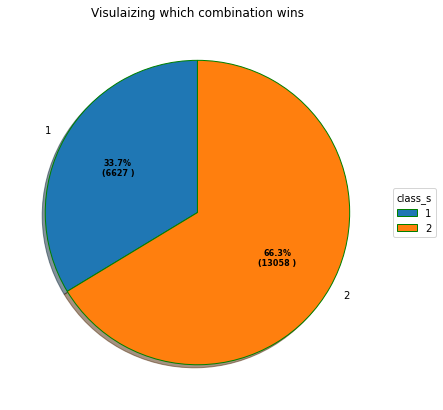

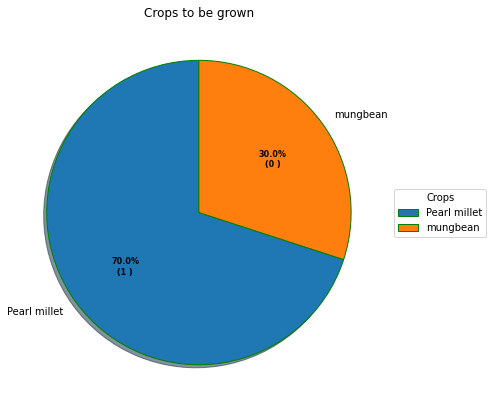

------Cover plants present in the crop combinations suggested : ['Pearl millet'] 

Seeding                                 010-30
When to plant2         June – August          
Maturity3                            65-70 DAP
Ht, ft4                                  06--8
Biomass,  benefits6                       3--5
Main tons/ac5                        W  NR, TS
How to manage7                 Mow, Roll or WK
Name: Pearl millet, dtype: object

Few other cover crops which are suitable 

------How benificial it is given in Main tons and biomass index produced per 100g 

                               Seeding  \
Crop Species                             
Lana vetch                       20-60   
Field peas                      70-120   
Lupine                          70-120   
Purple vetch                     30-80   
Bell / fava bean                80-150   
Ryegrass, ann.                   15-30   
Spring Barley                   50-125   
Spring oats                     80-140   
Black 

In [181]:

def nutrient_amount_key(clas,catog,dummy,crop_ratio_key,k):
    
    if (dummy !="all"):
        ratio = clas[k][dummy]
        crop_ratio_key.append({k:ratio})

    else:
        
        ratio = clas[k].sum() 
        crop_ratio_key.append({k:ratio})
        
       
    return(s,crop_ratio_key)

def nutrient_amount(clas,catog,dummy,crop_ratio,s,crop_b):
    for k in j[catog]:
        if (dummy !="all"):
            ratio = clas[k][dummy]
            crop_ratio.append({k:ratio})
            #print("crop ratio:",crop_ratio)
            s=s+ratio
            
            cr = soil_enr_crop(k,crop_b)
            
        else:
            ratio = clas[k].sum() 
            crop_ratio.append({k:ratio})
            #print("crop ratio:",crop_ratio)
            s=s+ratio
            
            cr = soil_enr_crop(k,crop_b)
    return(s,crop_ratio,cr)


def plotting(diction,titl_e,P_content):
    
    names = list(diction.keys())
    values = list(diction.values())

    #plt.bar(range(len(data)), values, tick_label=names)
    #plt.show()

    #fig = plt.figure(figsize =(10, 7))
    #plt.pie(values, labels = names)


    # Wedge properties
    wp = { 'linewidth' : 1, 'edgecolor' : "green" }

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d} )".format(pct, absolute)

    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(values, 
                                      autopct = lambda pct: func(pct, values),
                                      labels = names,
                                      shadow = True,
                                      startangle = 90,
                                      wedgeprops = wp,
                                      textprops = dict(color ="black"))

    # Adding legend
    ax.legend(wedges, names,
              title =titl_e,
              loc ="center left",
              bbox_to_anchor =(1, 0, 0.5, 1))

    plt.setp(autotexts, size = 8, weight ="bold")
    ax.set_title(P_content)

    # show plot

    # show plot
    plt.show()
out=[]
crop="Pearl millet"
dummy = "all"
acer_count = 2
## initializations

crop_ratio={}
crop_ratio_key=[]

l=(soil_enrich.index).tolist()
low = [i.lower() for i in l]
if crop in low:
    season = attr[crop]["season"]

## soil enrich sec

crop_b =[]
soil_crop=[]
cr = soil_enr_crop(crop,crop_b)
crop_b.append(cr)

so = soil_enr_season(season,soil_crop)
soil_crop.append(so)



s,crop_ratio_key = nutrient_amount_key(grains,"2",dummy,crop_ratio_key,crop)

l=len(comb[crop])  
content ={}
for i in range(1,l+1):
    
    a=comb[crop][i-1]
    
    for j in a:
        
        s=0
        crop_ratio_ini=[]
        
        if "1" in j:
            s,crop_ratio_ini,crop_b=nutrient_amount(sp_veg,"1",dummy,crop_ratio_ini,s,crop_b)
            
            
        else:
            s,crop_ratio_ini,crop_b=nutrient_amount(grains,"2",dummy,crop_ratio_ini,s,crop_b)
            
            
            
        content[i]=s
        crop_ratio[i]=crop_ratio_ini
        
print("content",content)        
print("crop_ratio",crop_ratio)
print("crop_ratio_key",crop_ratio_key)
print("soil crop",soil_crop)
print("crop_b",crop_b)
    
decision = {key: val for key, val in sorted(content.items(), key = lambda ele: ele[1], reverse = True)}
decision_list = list(decision.items())
probable =decision_list[0]
probable_class = decision_list[0][0]

no_of_subclass = len(crop_ratio[2])

print("probable",probable)
print("probable_class",probable_class)
print("no_of_subclass",no_of_subclass)
final ={}
final[crop]=0.7*acer_count

for i in range(no_of_subclass):
    final[list(crop_ratio[2][0].keys())[0]]=(list(crop_ratio[2][0].values())[0]*30*acer_count)/(probable[1]*100)
print("final",final)

print(" Combination fof classes for nutient: ",dummy,"\n ",content,"details \n",crop_ratio)

plotting(content,"class_s","Visulaizing which combination wins")

plotting(final,"Crops","Crops to be grown")
crop_bb=crop_b[:-1]

print("------Cover plants present in the crop combinations suggested :",crop_bb,"\n")

for i in crop_bb:
    print(soil_enrich.loc[i])
print("\nFew other cover crops which are suitable ")    
print("\n------How benificial it is given in Main tons and biomass index produced per 100g \n")

few_other=soil_enrich.loc[soil_crop[:-1]]
print(few_other)
out=[crop,final]
print(out)
#return(list(category,crop,dummy,acer_count,final,soil_crop))










In [77]:
def soil_enr_crop(crop,crop_b):
    
    
    l=(soil_enrich.index).tolist()
    low = [i.lower() for i in l]
    if crop in low:
        #biomass=soil_enrich["Biomass, benefits6"][crop]
        crop_b.append(crop)
    #print(crop_b)
    return(crop_b)

def soil_enr_season(season,soil_crop):  
    
    seas = soil_enrich["When to plant2"]
    for key,value in seas.iteritems():
        #print(value)
        match = re.search(season,value)
        if (match):
            soil_crop.append(key)
            
    #print(soil_crop)
    return(soil_crop)

#soil_enr_crop("pearl millet")
#soil_enr_season("early spring")